In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-06-16 17:43:12--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   293MB/s    in 0.2s    

2024-06-16 17:43:12 (293 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [ ]:
import os

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

In [ ]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

print(len(os.listdir(valid_cats_dir)))
print(len(os.listdir(valid_dogs_dir)))

1000
1000
500
500


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(
      loss = 'binary_crossentropy',
      optimizer = RMSprop(learning_rate = 0.0001),
      metrics = ['accuracy']
  )

  return model

In [ ]:
# Before Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
first_model = create_model()
first_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
history_first_model = first_model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    verbose = 1,
    validation_data = valid_generator,
    validation_steps = 100
)

Epoch 1/20
100/100 [==============================] - 7s 60ms/step - loss: 0.6919 - accuracy: 0.5150 - val_loss: 0.6850 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 5s 48ms/step - loss: 0.6773 - accuracy: 0.5590 - val_loss: 0.6579 - val_accuracy: 0.6270
Epoch 3/20
100/100 [==============================] - 6s 60ms/step - loss: 0.6567 - accuracy: 0.6095 - val_loss: 0.6388 - val_accuracy: 0.6470
Epoch 4/20
100/100 [==============================] - 6s 58ms/step - loss: 0.6276 - accuracy: 0.6450 - val_loss: 0.6387 - val_accuracy: 0.6220
Epoch 5/20
100/100 [==============================] - 5s 52ms/step - loss: 0.5850 - accuracy: 0.6940 - val_loss: 0.5757 - val_accuracy: 0.6980
Epoch 6/20
100/100 [==============================] - 5s 47ms/step - loss: 0.5633 - accuracy: 0.7080 - val_loss: 0.5677 - val_accuracy: 0.6940
Epoch 7/20
100/100 [==============================] - 6s 60ms/step - loss: 0.5371 - accuracy: 0.7290 - val_loss: 0.5813 - val_accuracy: 0.6910

In [ ]:
# After Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
second_model = create_model()

history_second_model = second_model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    verbose = 1,
    validation_data = valid_generator,
    validation_steps = 100
)

Epoch 1/20
100/100 [==============================] - 19s 173ms/step - loss: 0.6939 - accuracy: 0.5240 - val_loss: 0.6844 - val_accuracy: 0.5910
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6864 - accuracy: 0.5365 - val_loss: 0.6836 - val_accuracy: 0.5120
Epoch 3/20
100/100 [==============================] - 15s 154ms/step - loss: 0.6787 - accuracy: 0.5625 - val_loss: 0.6802 - val_accuracy: 0.5340
Epoch 4/20
100/100 [==============================] - 16s 162ms/step - loss: 0.6713 - accuracy: 0.5855 - val_loss: 0.6521 - val_accuracy: 0.6130
Epoch 5/20
100/100 [==============================] - 16s 162ms/step - loss: 0.6659 - accuracy: 0.5890 - val_loss: 0.6562 - val_accuracy: 0.5970
Epoch 6/20
100/100 [==============================] - 15s 154ms/step - loss: 0.6631 - accuracy: 0.6025 - val_loss: 0.6353 - val_accuracy: 0.6400
Epoch 7/20
100/100 [==============================] - 15s 152ms/step - loss: 0.6511 - accuracy: 0.6200 - val_loss: 0.6236 - val_ac

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


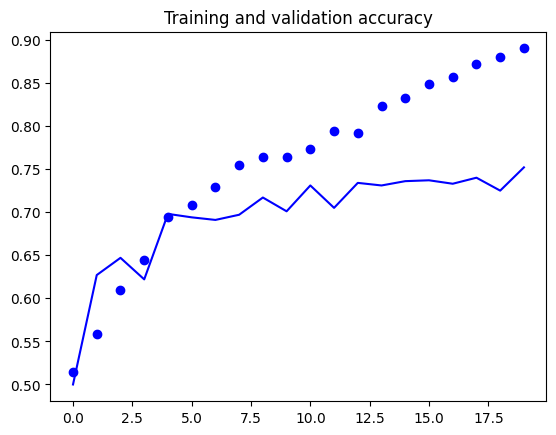

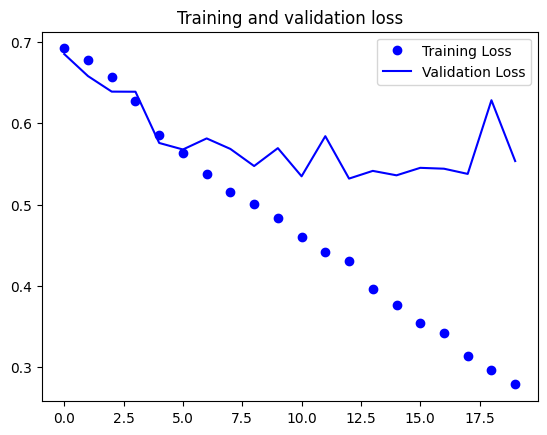

In [ ]:
# Before Data Augmentation
plot_loss_acc(history_first_model)

In [ ]:
# After Data Augmentation
# plot_loss_acc(history_second_model)